## Final Project Submission

Please fill out:
* Student name: Huseyin Caglar
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Import Neccesary Libraries and Loading Data

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats
from statsmodels.formula.api import ols

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import quantile_transform
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

In [3]:
cd data


C:\Users\AI\Desktop\Flatiron\Phase_2\dsc-phase-2-project\data


In [4]:
ls

 Volume in drive C has no label.
 Volume Serial Number is A0B5-0BC1

 Directory of C:\Users\AI\Desktop\Flatiron\Phase_2\dsc-phase-2-project\data

09/26/2021  04:32 PM    <DIR>          .
09/26/2021  04:32 PM    <DIR>          ..
09/16/2021  05:04 PM             1,120 column_names.md
09/16/2021  05:04 PM         2,475,934 kc_house_data.csv
               2 File(s)      2,477,054 bytes
               2 Dir(s)  382,656,647,168 bytes free


In [5]:
df = pd.read_csv('kc_house_data.csv')

In [6]:
df.shape

(21597, 21)

In [7]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


## Data Cleaning

In [8]:
#Looking for missing values.
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [9]:
#Filling missing values.
df['yr_renovated']= df['yr_renovated'].fillna(0)
df['view'] = df['view'].fillna(0.0)
df['waterfront'] = df['waterfront'].fillna(0.0)

In [10]:
#Dropping not usual columns.
df.drop(columns=['id','date','zipcode','lat','long'],inplace=True)

In [11]:
#Cleaning sqft_basement column.
df.sqft_basement = df.sqft_basement.replace('?',0.0)

In [12]:
df.sqft_basement = df.sqft_basement.astype(float)

<AxesSubplot:>

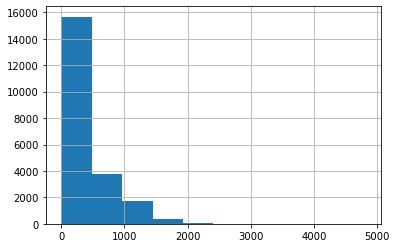

In [13]:
df.sqft_basement.hist()

In [14]:
# Turning sqft_basement column to binary.
df.sqft_basement[df.sqft_basement!=0]=1

<ipython-input-14-543a2f2e22e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sqft_basement[df.sqft_basement!=0]=1


## Train Test Split

In [15]:
y = df['price']
X= df.drop(columns=['price'],axis=1)

In [16]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 200)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((16197, 15), (5400, 15), (16197,), (5400,))

## Data Processing / Feature Engineering

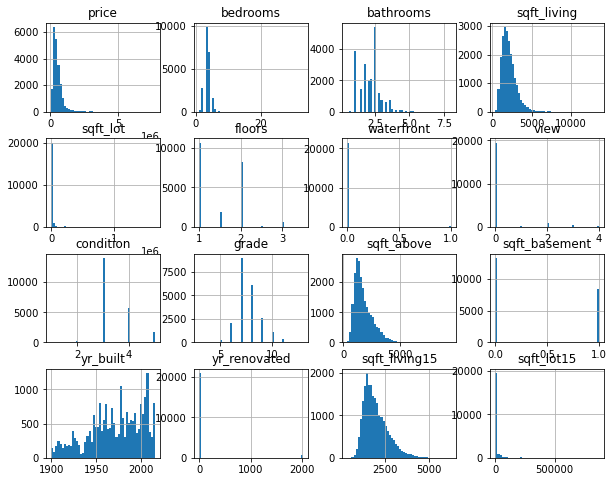

In [17]:
df.hist(bins=50, figsize=(10, 8))
plt.show()

In [18]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

C:\Users\AI\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


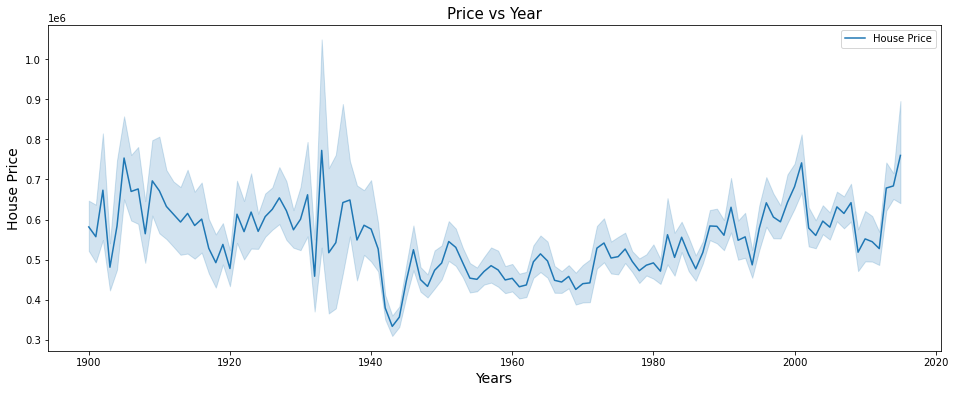

In [19]:
plt.figure(figsize=(16,6))
plt.title('Price vs Year', fontdict={'fontsize': 15})
sns.lineplot(df.yr_built, df.price, label='House Price')
plt.legend()
plt.xlabel('Years',fontsize=14)
plt.ylabel('House Price',fontsize=14)
plt.show()



## Checking For Multicollinearity

In [20]:
x = df.drop('price',axis=1)

In [21]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

vif["features"] = x.columns

print(vif)

    VIF Factor       features
0    23.278227       bedrooms
1    25.361054      bathrooms
2    99.157874    sqft_living
3     2.362706       sqft_lot
4    16.477404         floors
5     1.185197     waterfront
6     1.483257           view
7    30.190016      condition
8   141.995085          grade
9    89.100513     sqft_above
10    5.155684  sqft_basement
11  128.138178       yr_built
12    1.053819   yr_renovated
13   26.433164  sqft_living15
14    2.574779     sqft_lot15


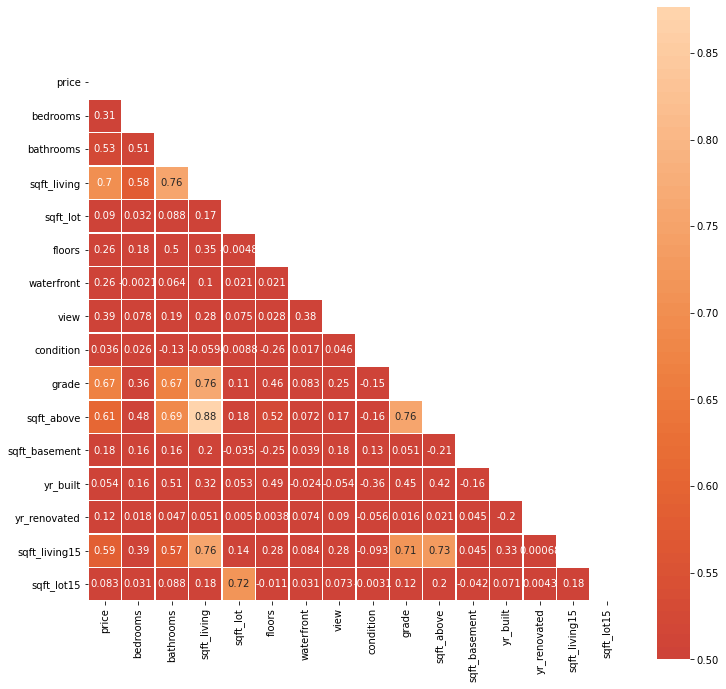

In [22]:
plt.figure(figsize=(12,12))
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask ,annot=True, center=0, vmin=.5, square=True, linewidth=.5)
plt.show()

In [23]:
df.drop(columns=['sqft_above','grade','bathrooms'],inplace=True)

In [24]:
#Binning yr_built.
df.yr_built.describe()

built_bins=[1900,1930,1960,1990,2020]
labels=['1900_1930', '1930_1960','1960_1990','1990_2020']
bins_built= pd.cut(df['yr_built'], built_bins , labels=labels )
bins_built = bins_built.cat.as_unordered()
df.yr_built=bins_built



In [25]:
#Cleaning columns for one hot coding.
df=df.round({'floors': 0})
df.floors=df.floors.astype(int)
df.waterfront=df.waterfront.astype(int)
df.view=df.view.astype(int)

cat_list=['yr_built','condition','waterfront','floors','view', 'bedrooms','sqft_basement']

In [26]:
df_cat=pd.DataFrame()
for i in cat_list:
    df_cat[i]=df[i].astype('category')

In [27]:
for i in cat_list:
    dummies=pd.get_dummies(df_cat[i],prefix=i, drop_first=True)
    df_cat=df_cat.join(dummies)
    df_cat.drop([i], axis=1, inplace=True)

In [28]:
df_cat.head()

,yr_built_1930_1960,yr_built_1960_1990,yr_built_1990_2020,condition_2,condition_3,condition_4,condition_5,waterfront_1,floors_2,floors_3,...,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_33,sqft_basement_1.0
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Standardization

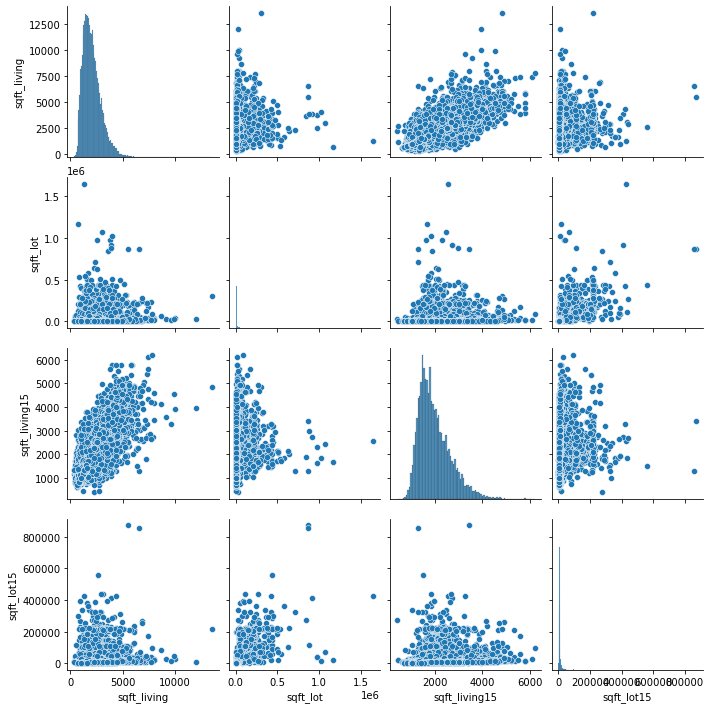

In [29]:
df_cont=df.loc[:,['sqft_living','sqft_lot','sqft_living15','sqft_lot15']]
g = sns.pairplot(df_cont)

In [30]:
#Standardizing.
transform = quantile_transform(df_cont[[
                                        'sqft_living',
                                        'sqft_lot',
                                        'sqft_living15',
                                        'sqft_lot15']],
                               output_distribution = 'normal'
                                )

trans_features = pd.DataFrame(transform)
trans_features.columns=[
                        'sqft_living',
                        'sqft_lot',
                        'sqft_living15',
                        'sqft_lot15']



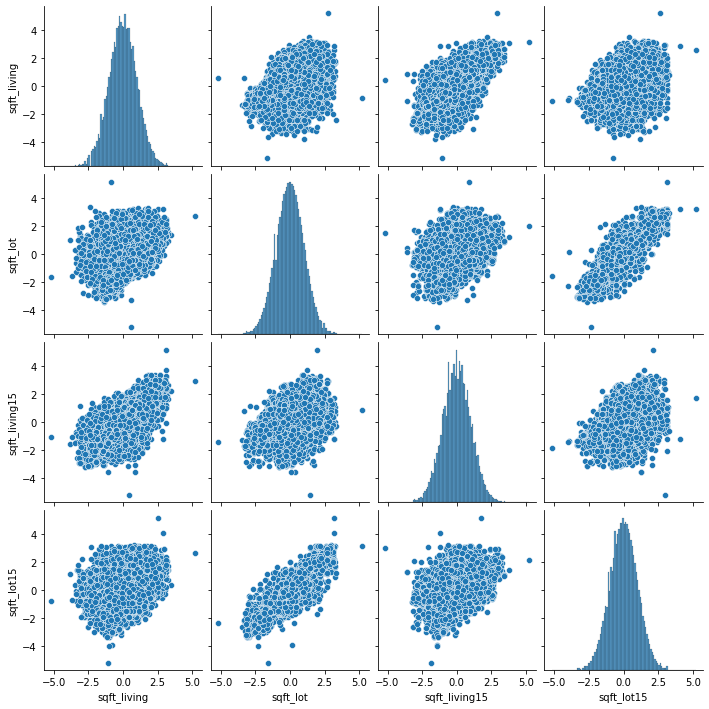

In [31]:
g = sns.pairplot(trans_features)

In [32]:
# Features now normally distributed.

## Modeling

In [63]:
df_final=pd.concat([trans_features, df_cat, df.price], axis=1)

In [34]:
#Looking final missing values before modeling.
df_final.isna().sum()

sqft_living           0
sqft_lot              0
sqft_living15         0
sqft_lot15            0
yr_built_1930_1960    0
yr_built_1960_1990    0
yr_built_1990_2020    0
condition_2           0
condition_3           0
condition_4           0
condition_5           0
waterfront_1          0
floors_2              0
floors_3              0
floors_4              0
view_1                0
view_2                0
view_3                0
view_4                0
bedrooms_2            0
bedrooms_3            0
bedrooms_4            0
bedrooms_5            0
bedrooms_6            0
bedrooms_7            0
bedrooms_8            0
bedrooms_9            0
bedrooms_10           0
bedrooms_11           0
bedrooms_33           0
sqft_basement_1.0     0
dtype: int64

In [64]:
df_final

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,yr_built_1930_1960,yr_built_1960_1990,yr_built_1990_2020,condition_2,condition_3,condition_4,...,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bedrooms_10,bedrooms_11,bedrooms_33,sqft_basement_1.0,price
0,-1.109378,-0.517790,-1.037937,-0.517790,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,221900.0
1,0.694311,-0.115464,-0.247134,0.007616,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,538000.0
2,-2.131682,0.562796,1.064091,0.154186,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,180000.0
3,0.051460,-0.718462,-0.985610,-0.744694,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,604000.0
4,-0.293986,0.128003,-0.062770,-0.040336,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,-0.509202,-2.132221,-0.573115,-1.831578,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,360000.0
21593,0.436240,-0.475178,-0.012546,-0.165095,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,400000.0
21594,-1.428482,-1.837261,-2.043115,-1.644085,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,402101.0
21595,-0.406079,-1.515547,-0.862544,-2.068024,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,400000.0


In [65]:
y = df_final['price']
X= df_final.drop('price',axis=1)

In [66]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 200)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((16197, 31), (5400, 31), (16197,), (5400,))

In [ ]:
X_train.dtypes

In [67]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.846
Model:                            OLS   Adj. R-squared (uncentered):              0.846
Method:                 Least Squares   F-statistic:                              2866.
Date:                Thu, 04 Nov 2021   Prob (F-statistic):                        0.00
Time:                        23:42:00   Log-Likelihood:                     -2.2468e+05
No. Observations:               16197   AIC:                                  4.494e+05
Df Residuals:                   16166   BIC:                                  4.497e+05
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
sqft_living         1.941e+05   4156.881     46.689      0.000    1.86e+05    2.02e+05
sqft_lot           -1.189e+04   5447.142     -2.183      0.029   -2.26e+04   -1216.538
sqft_living15       7.906e+04   3232.187     24.461      0.000    7.27e+04    8.54e+04
sqft_lot15         -7700.0396   5379.862     -1.431      0.152   -1.82e+04    2845.086
yr_built_1930_1960 -7.218e+04   7690.198     -9.386      0.000   -8.73e+04   -5.71e+04
yr_built_1960_1990 -1.783e+05   7635.611    -23.347      0.000   -1.93e+05   -1.63e+05
yr_built_1990_2020 -1.868e+05   7933.696    -23.544      0.000   -2.02e+05   -1.71e+05
condition_2         6.806e+05   3.08e+04     22.102      0.000     6.2e+05    7.41e+05
condition_3         7.081e+05   2.16e+04     32.709      0.000    6.66e+05    7.51e+05
condition_4         7.225e+05   2.18e+04     33.203      0.000     6.8e+05    7.65e+05
condition_5         7.617e+05   2.25e+04     33.859      0.000    7.18e+05    8.06e+05
waterfront_1         5.52e+05   2.96e+04     18.663      0.000    4.94e+05     6.1e+05
floors_2            2.656e+04   5844.280      4.545      0.000    1.51e+04     3.8e+04
floors_3            1.802e+05   1.42e+04     12.695      0.000    1.52e+05    2.08e+05
floors_4            1.641e+05   1.15e+05      1.428      0.153   -6.12e+04    3.89e+05
view_1               1.58e+05   1.65e+04      9.599      0.000    1.26e+05     1.9e+05
view_2              1.002e+05   9954.529     10.066      0.000    8.07e+04     1.2e+05
view_3              1.996e+05   1.37e+04     14.583      0.000    1.73e+05    2.26e+05
view_4              3.633e+05   2.06e+04     17.636      0.000    3.23e+05    4.04e+05
bedrooms_2          2.164e+04   2.09e+04      1.035      0.301   -1.94e+04    6.26e+04
bedrooms_3         -8.437e+04   2.09e+04     -4.046      0.000   -1.25e+05   -4.35e+04
bedrooms_4         -1.181e+05   2.15e+04     -5.504      0.000    -1.6e+05   -7.61e+04
bedrooms_5         -8.359e+04   2.28e+04     -3.671      0.000   -1.28e+05    -3.9e+04
bedrooms_6          -3.75e+04   2.88e+04     -1.304      0.192   -9.39e+04    1.89e+04
bedrooms_7         -9.805e+04   5.34e+04     -1.836      0.066   -2.03e+05    6652.955
bedrooms_8         -7.512e+04   8.41e+04     -0.894      0.372    -2.4e+05    8.97e+04
bedrooms_9         -1.861e+05    1.5e+05     -1.242      0.214    -4.8e+05    1.07e+05
bedrooms_10        -1.997e+05    1.5e+05     -1.335      0.182   -4.93e+05    9.36e+04
bedrooms_11        -3.707e+05   2.57e+05     -1.441      0.150   -8.75e+05    1.34e+05
bedrooms_33         9.552e+04   2.57e+05      0.371      0.710   -4.09e+05       6e+05
sqft_basement_1.0    720.6053   5074.422      0.142      0.887   -9225.824    1.07e+04
==========================

## Conclusion

 This model %84 percent predict house price.

 Most important features;
 1. Living size(Square feet)
 2. Waterfront effects a lot.
 3. Condition is one of most importants.
 4. Views effects a lot also.

## Future Work

 For future work for this model could be work on location with lat long or zipcode. 